<a href="https://colab.research.google.com/github/CartagenaMinas/IDL_Mining_post/blob/main/R/Post_1_An%C3%A1lisis_Exploratorio_Geoestad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Eploratorio Geoestadística**

## **1. Conceptos básicos de estadística descriptiva**
Primero revisaremos algunos de los conceptos básicos más utilizados:

### **Definición 1.1 Atributo:** 
<p align = "justify">Es una propiedad común a todos los objetos en estudio. En el caso de las geociencias, se trata de propiedades físicas, químicas e incluso biológicas.

### **Definición 1.2 Variable:** 
<p align = "justify">Es la representación matemática de un atributo, que puede ser cuantitativo o cualitativo.
Cuando existe incertidumbre sobre los valores asumidos por una variable, se puede representar mediante una variable aleatoria.

### **Definición 1.3 Población:** 
<p align = "justify">Es el conjunto de interés para el problema a estudiar. Sus elementos tienen al menos un atributo en común. Las poblaciones pueden ser finitas o infinitas, discretas o continuas.

### **Definición 1.4 Muestra:** 
<p align = "justify">Es un subconjunto representativo y finito de la población. El término *muestra* puede designar un conjunto de observaciones o una observación particular. La selección de muestras es fundamental en un proyecto de geoestadística o estadística.

### **Definición 1.5 Unidad Muestral:** 
<p align = "justify">Es la parte más pequeña de la población identificable.
En un censo, por ejemplo, es un hogar, ya que sería imposible entrevistar individualmente a cada habitante del país. O un testigo, en el caso de un perforación diamantina.

### **Definición 1.6 Soporte:** 
<p align = "justify">Es el modelo geométrico de la unidad de muestreo, en el caso de muestras referenciadas espacialmente.
En Geoestadística, el soporte es muy importante en el cálculo de los predictores de kriging.

### **Definición 1.7 Estadística:** 
<p align = "justify">Se refiere a una medida calculada sobre la muestra.
Las estadísticas comunes son la media, la varianza y la correlación de la muestra.

### **Definición 1.8 Parámetro:** 
<p align = "justify">Es un valor calculado a partir de un modelo de variable aleatoria.
Los parámetros son extensiones matemáticas de las estadísticas, por lo que hay parámetros de tendencia central, orden, dispersión, etc.

### **Definición 1.9 Frecuecia Relativa:** 
<p align = "justify">Es la estadística más comúnmente utilizada, obtenida al dividir el número de veces que ocurrió un evento dado en un experimento u observación por el número de veces que se realizó el experimento u observación.

### **Definición 1.10 Estadísticas básicas:** 
<p align = "justify">Son las estadísticas de tendencia central: media, mediana y moda; estadísticas de orden: mínimo, máximo, primer cuartil, segundo cuartil o mediana y tercer cuartil; y una estadística de dispersión: desviación estándar.

### **Definición 1.11 Coeficiente:** 
<p align = "justify">Es la relación entre dos estadísticas o parámetros. En el primer caso es un coeficiente de muestreo, en el segundo es un coeficiente de población.

### **Definición 1.12 Coeficiente de apuntamiento:** 
<p align = "justify">Es un coeficiente que compara una muestra o distribución poblacional con el valor que tendría este coeficiente para una distribución normal teórica con la misma media y varianza.

### **Definición 1.13 Coeficiente de asimetría:** 
<p align = "justify">En el caso de la muestra, indica si el histograma es asimétrico o no.

<p align = "justify">Ilustraremos el cálculo de estadísticas básicas en un archivo de datos del Panel Intergubernamental sobre Cambios Climáticos (IPCC), llamado <a href="https://drive.google.com/drive/folders/1edLTpZEy0CgHPmeR2HAcJW1yhzJigjr4?usp=sharing">basejan0110</a>, que corresponde a las temperaturas promedio en una región amazónica en los primeros diez años del siglo XX. El archivo se compone de tres columnas: 1 coordenada horizontal Este-Oeste (UTM); 2 coordenada vertical Norte-Sur (UTM); 3 temperatura en grados Celsius multiplicada por 10. La primera línea corresponde al encabezado del archivo con los nombres de las variables. 

A continuación cargaremos el archivo y presentamos algunas filas de la tabla.

In [4]:
amazonia <- read.table("basejan0110.txt", header = TRUE, sep = " ")
head(amazonia)

,X,Y,jan
,<dbl>,<dbl>,<int>
1,138.1644,27.67733,257
2,138.1918,83.03201,260
3,138.2467,138.38678,262
4,138.3290,193.74169,264
5,138.4387,249.09680,264
6,138.5758,304.45217,267


Ahora presentamos las estadísticas básicas para cada una de las variables. 

In [5]:
summary(amazonia)

       X               Y               jan       
 Min.   :138.2   Min.   : 27.63   Min.   :245.0  
 1st Qu.:305.4   1st Qu.:248.72   1st Qu.:260.0  
 Median :472.3   Median :469.98   Median :263.0  
 Mean   :472.3   Mean   :470.02   Mean   :261.7  
 3rd Qu.:639.0   3rd Qu.:691.37   3rd Qu.:265.0  
 Max.   :806.1   Max.   :913.39   Max.   :270.0  

### **Definición 1.14 Histograma:** 
<p align = "justify">El histograma representa gráficamente las frecuencias de ocurrencia en función del valor. Consiste en dividir el rango de los valores en intervalos (generalmente, con el mismo ancho) y visualizar la proporción de datos que caben dentro de cada intervalo.

<p align = "justify">El histograma es una herramienta útil para detectar valores atípicos (“outliers”). Ahora, cabe destacar que un dato atípico no es forzosamente falso y nunca debe ser eliminado sin razón (por ejemplo, un error de trascripción, una falla en el protocolo de medición o un valor ausente codificado como -99). Podría reflejar el comportamiento verdadero de la variable regionalizada y eliminarlo impediría prever la ocurrencia de tales valores en las zonas no muestreadas.

<p align = "justify">Con el siguiente código mostraremos el histograma de temperaturas del archivo basejan0110.  

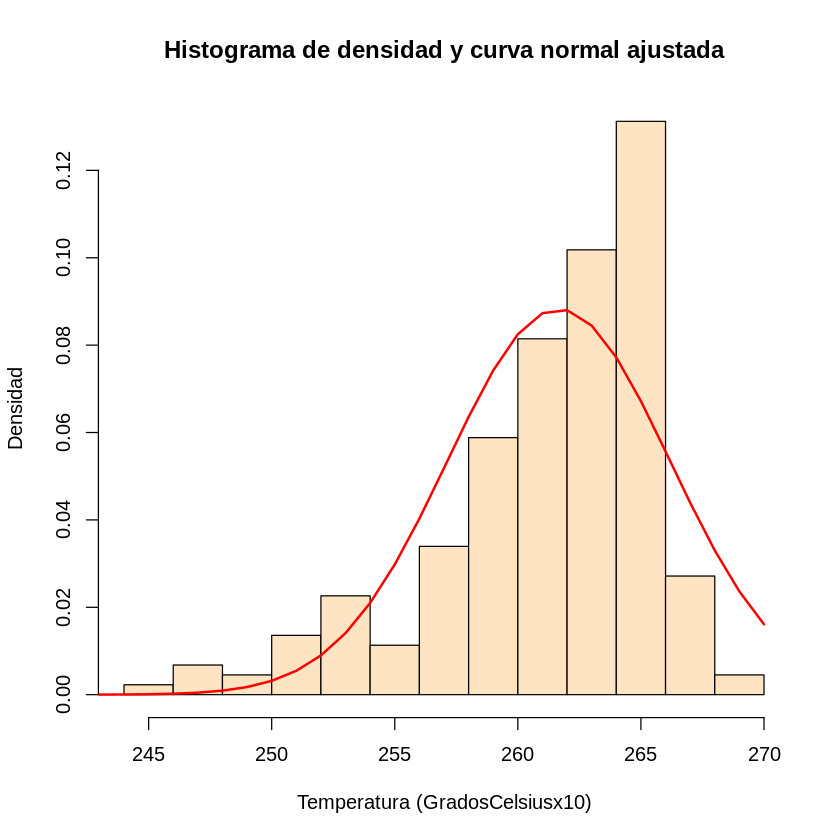

In [6]:
grados<-amazonia[,3] #Para realizar el histogramá se usará la 3era columna (Temperatura)
h<-hist(grados,breaks=15, main="Histograma de densidad y curva normal ajustada", 
xlab = "Temperatura (GradosCelsiusx10)", ylab = "Densidad", probability = TRUE, 
col = "bisque") #Grafica el histograma
par(new=TRUE) #Permite superponer gráficos
xfit<-seq(240,270, by=1.0)
yfit<-dnorm(xfit,mean=mean(grados),sd=sd(grados))  
#dnorm sirve para calcular la densidad usando la función de densidad normal de parámetros μ y σ para los valores de xfit.
lines(xfit,yfit,col="red",lwd = 2) #Grafica la curva

<p align = "justify">La curva roja representa la densidad de una distribución normal con la misma media y varianza. Podemos verificar fácilmente que se trata de un histograma unimodal, asimétrico hacia la izquierda y leptocurtico. El área bajo la función de densidad en el dominio, por definición, es igual a 1.

### **Definición 1.15 Distribución Acumulada Empírica:** 
<p align = "justify">Proporciona la frecuencia relativa acumulativa de la muestra para cada umbral zk.


<p align = "justify">Es un gráfico que tiene muchas aplicaciones, por ejemplo, en un modelo de bloques podemos obtener la proporción de bloques que están por debajo de una ley de corte. 

<p align = "justify">Para hacer el gráfico se utliza el comando $plot$ y el comando $ecdf$ sobre los datos de temperatura. Lo vemos en el siguiente código.

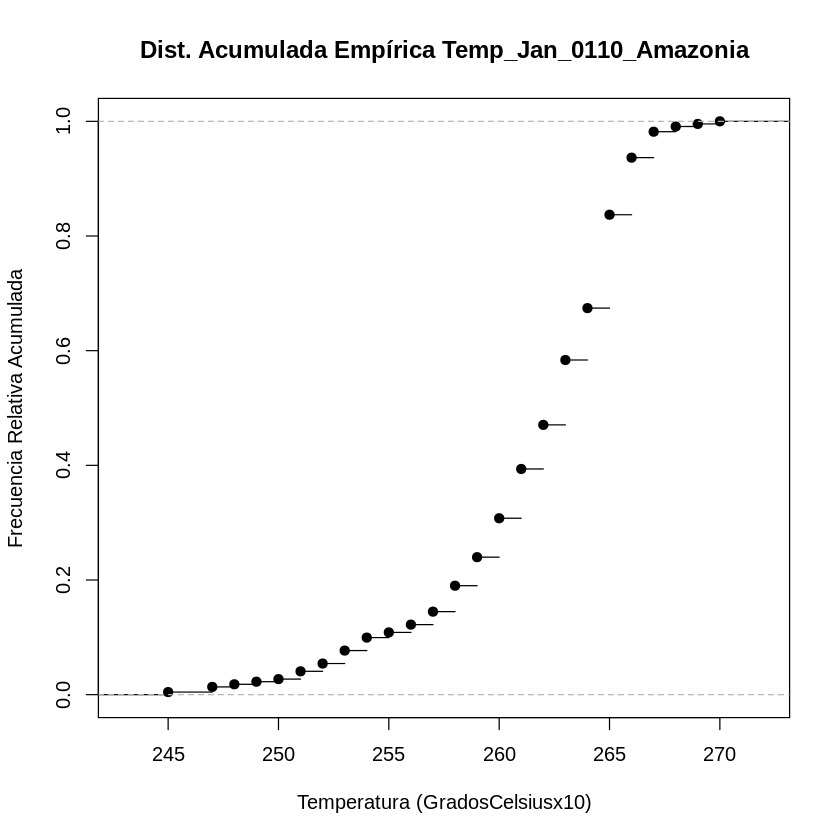

In [7]:
grados<-amazonia[,3]
plot(ecdf(grados),main="Dist. Acumulada Empírica Temp_Jan_0110_Amazonia",
xlab="Temperatura (GradosCelsiusx10)",
ylab="Frecuencia Relativa Acumulada")

## **2. Explorando datos espacialmente distribuidos**

### **El dataset *Jura***
<p align = "justify">Este conjunto de datos es de dominio público y está incluido en el paquete $gstat$. Este paquete debe ser instalado para poder tener acceso a los datos.


In [8]:
install.packages("gstat")
library(gstat)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘intervals’, ‘sp’, ‘zoo’, ‘spacetime’, ‘FNN’




Para cargar los datos usamos el siguiente comando:

In [9]:
data(jura)

<p align = "justify">Los datos están estructurados en un $dataframe$ y representan un levantamiento realizado en Suiza. Son muestreos realizados en 359 pozos, considerando los siguientes atributos: coordenadas, tipo de roca, uso del suelo, contenido de metales pesados. 
Contiene una muestra de entrenamiento (prediction.dat) y una muestra de validación (validation.dat) con 259 y 100 posiciones respectivamente.

In [10]:
head(prediction.dat)

,Xloc,Yloc,Landuse,Rock,Cd,Co,Cr,Cu,Ni,Pb,Zn
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.386,3.077,3,3,1.740,9.320,38.32,25.72,21.32,77.36,92.56
2,2.544,1.972,2,2,1.335,10.000,40.20,24.76,29.72,77.88,73.56
3,2.807,3.347,2,3,1.610,10.600,47.00,8.88,21.40,30.80,64.80
4,4.308,1.933,3,2,2.150,11.920,43.52,22.70,29.72,56.40,90.00
5,4.383,1.081,3,5,1.565,16.320,38.52,34.32,26.20,66.40,88.40
6,3.244,4.519,3,5,1.145,3.508,40.40,31.28,22.04,72.40,75.20


<p align = "justify">Si observamos el dataframe $prediction.dat$ vemos que cuenta con los siguientes componentes: Xloc e Yloc son las coordenadas de posición en km (UTM); El uso de la tierra puede ser 1 (bosque), 2 (pasto), 3 (pradera), 4 (cultivo); el tipo de roca puede ser 1 (Argoviano), 2 (Kimmeridgiano), 3 (Sequaniano), 4 (Portlandiano) e 5 (Cuaternario). Las siguientes columnas se refieren al contenido de los metales pesados Cd, Cu, Pb, Co, Cr, Ni y Zn; ​​en partes por millón (ppm).

### **2.1 Despliegue de datos (mapas)**
<p align = "justify">El despliegue de los datos permite visualizar su ubicación en el espacio. Cuando se trabaja en el espacio tridimensional, el despliegue puede hacerse con proyecciones (plantas y secciones) o vistas en perspectiva. Los mapas de datos pueden incluir información sobre los valores medidos y así dar una idea preliminar de la distribución y continuidad espacial de la variable en estudio, por ejemplo, utilizando símbolos de forma o tamaño variable o
escalas de colores / de grises.

Vamos a realizar el despliegue de nuestros datos:

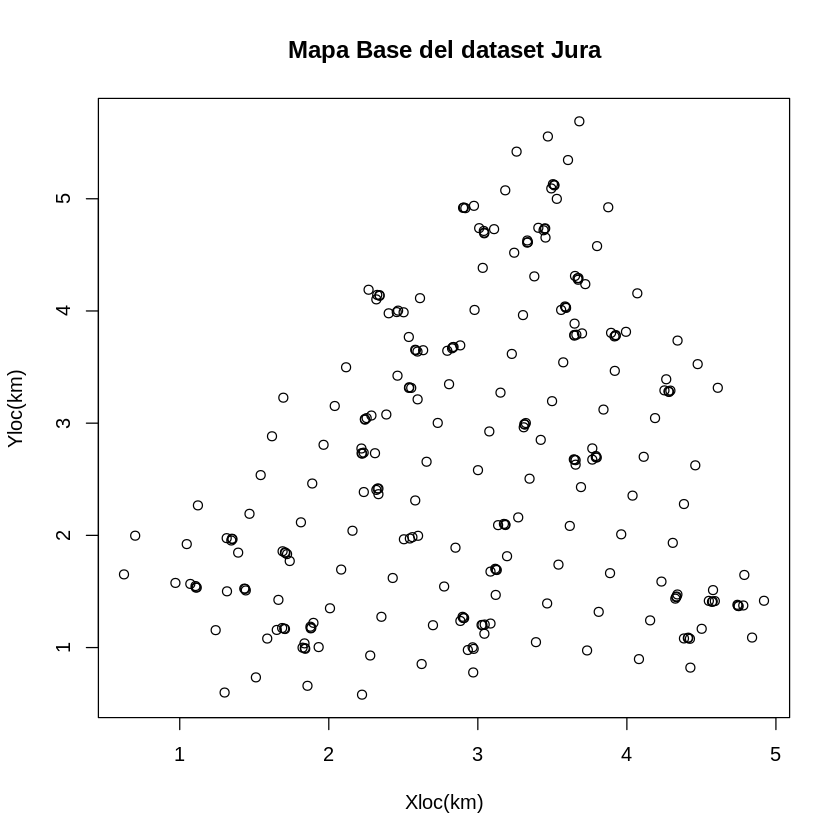

In [11]:
plot(prediction.dat[,1], prediction.dat[,2], xlab = "Xloc(km)", ylab = "Yloc(km)",
main="Mapa Base del dataset Jura")

<p align = "justify">Hemos usado el comando $plot$, cuyos primeros dos parámetros son las coordenadas de posición que ocupan las dos primeras columnas del dataframe prediction.dat. Los otros parámetros de comando - xlab, ylab y main - son parámetros descriptivos del mapa, la denominación de cada eje y el título de la figura respectivamente.
<p align = "justify">Otro enfoque es utilizar los paquetes de datos espaciales $sp$ y $lattice$.

In [12]:
install.packages("sp")
install.packages("lattice")
library(sp)
library(lattice)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



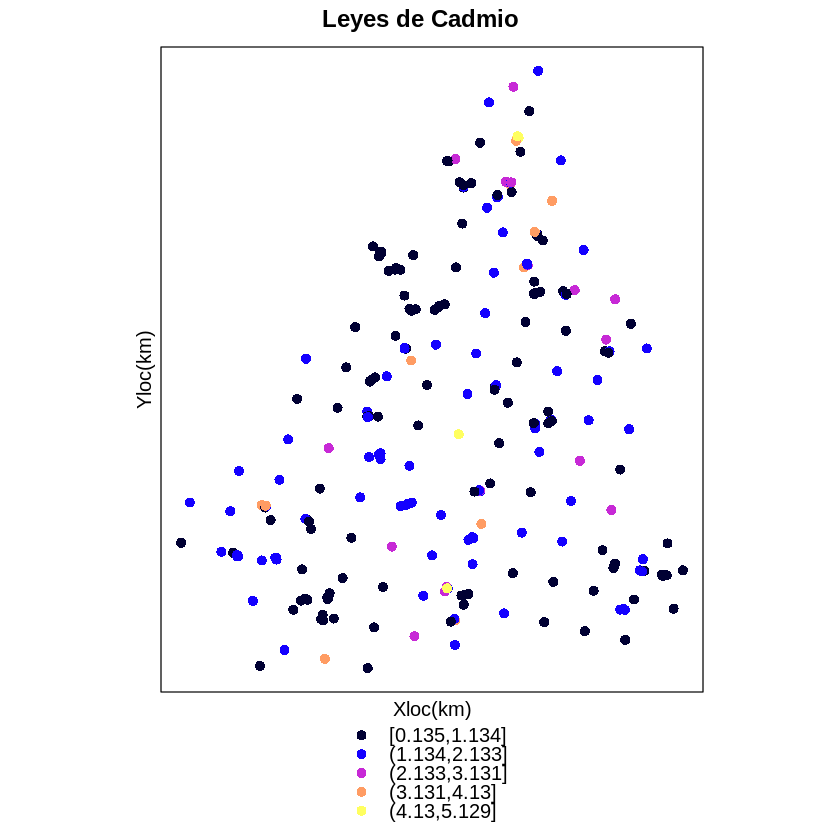

In [13]:
data(jura)
coordinates(prediction.dat)<-c("Xloc","Yloc")
spplot(prediction.dat, "Cd",xlab="Xloc(km)",ylab="Yloc(km)",
main="Leyes de Cadmio", col.regions=bpy.colors(5))

<p align = "justify">Si en lugar de una escala de colores desea una escala de tamaño, podemos usar el comando $buble$ del paquete $lattice$:

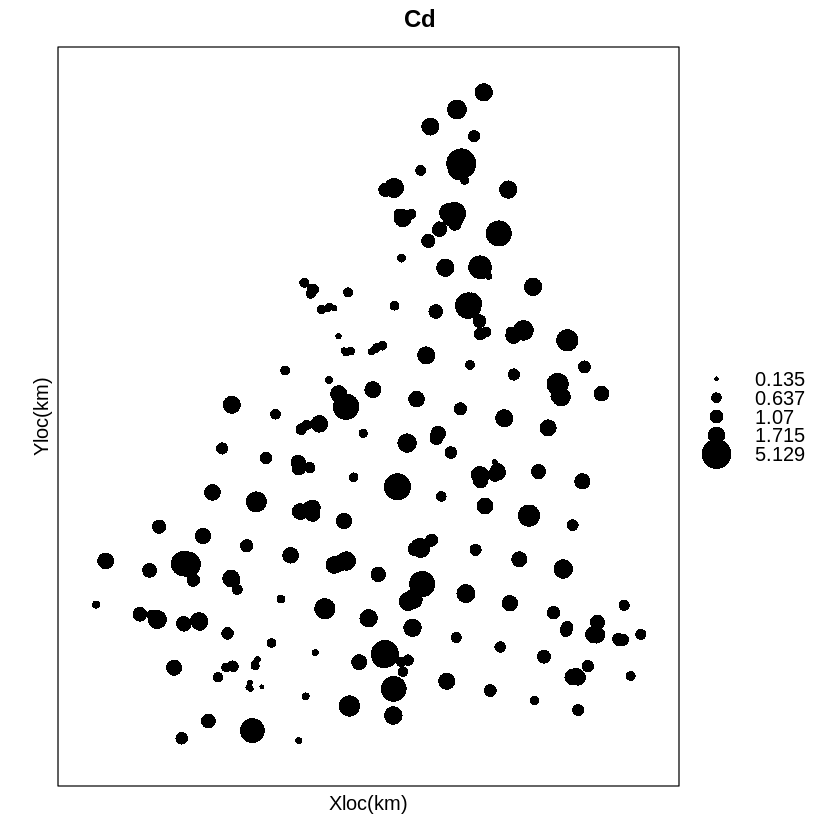

In [14]:
data(jura)
coordinates(prediction.dat)<-c("Xloc","Yloc")
bubble(prediction.dat,"Cd", col="black", xlab="Xloc(km)",
ylab="Yloc(km)")

### **2.2 Diagrama de caja**
<p align = "justify">El diagrama de caja o boxplot presenta un solo eje en el cual se representan cinco cuantiles: los cuantiles a 2.5%, a 97.5%, el primer cuartil, el segundo cuartil o mediana y el tercer cuartil. Entre los dos cuantiles extremos, se observa el 95% de los datos, mientras que entre el primer cuartil y la mediana se observa el 25% de los datos, al igual que entre la mediana y el tercer cuartil. El diagrama de caja permite resumir algunas características de la distribución, tal como su simetría y su dispersión. También nos permite visualizar los valores atípicos u outliers, que son los que se encuentran fuera de los extremos (inferior y superior) del diagrama de caja. 

Para obtener este tipo de gráfico se ejecuta el siguiente código:

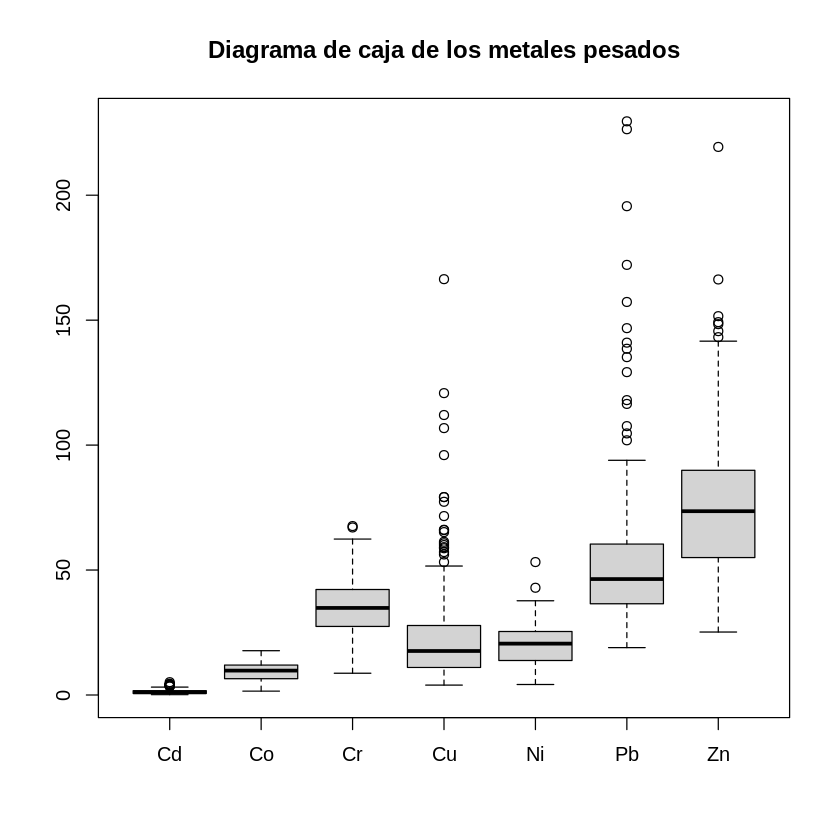

In [15]:
h<-prediction.dat
boxplot(h$Cd,h$Co,h$Cr,h$Cu,h$Ni,h$Pb,h$Zn,range=1.5,
names=c("Cd","Co" ,"Cr","Cu","Ni","Pb","Zn"), 
main = "Diagrama de caja de los metales pesados")

### **2.3 Distribución Condicional**
<p align = "justify">Para realizar una distribución condicional se tiene que hacer uso del comando $subset$, este nos permite obtener un conjunto de datos que cumplen unas condiciones establecidas. Este condicionamiento puede ser realizado para 1 o  más atributos. 

<p align = "justify">Por ejemplo, podemos obtener la distribución acumulada para las leyes de Cadmio pero solo para las muestras que se realizaron en tierras de cultivo. En este ejemplo estaríamos usando el atributo $Landuse$ para condicionar los datos, solo usaremos las observaciones cuyo valor en la columna Landuse es igual a 4 (cultivo).

Ejecutaremos el siguiente código:


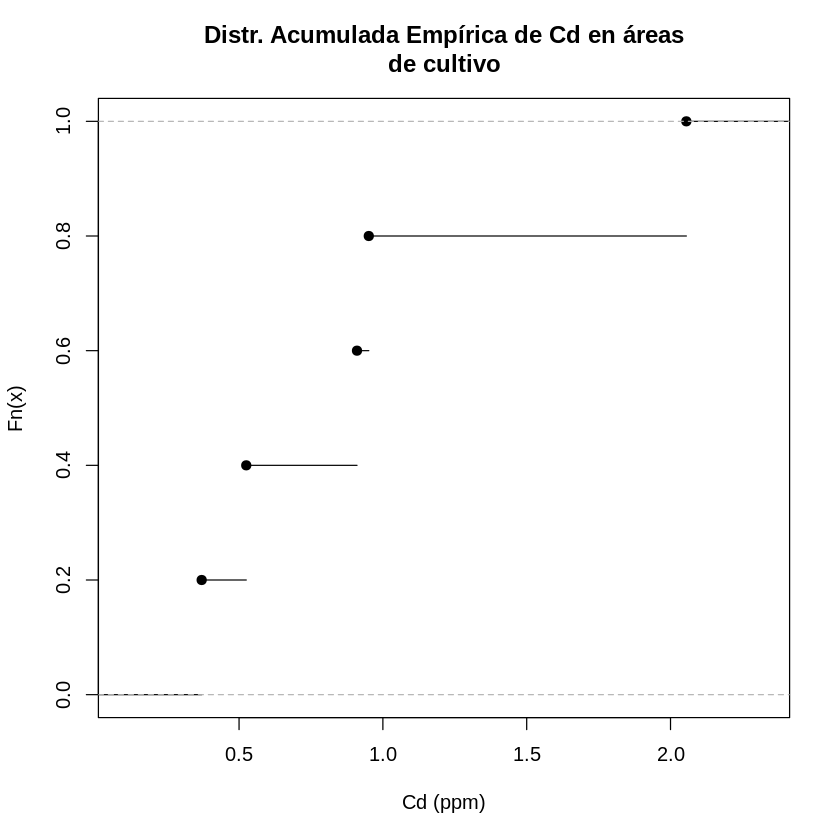

In [16]:
s<-subset(prediction.dat,Landuse==4)
plot(ecdf(s$Cd),main="Distr. Acumulada Empírica de Cd en áreas
de cultivo",xlab="Cd (ppm)")

### **2.4 Muestreo**
<p align = "justify">Los procedimientos de muestreo básicos son el muestreo aleatorio simple o el muestreo aleatorio estratificado, el muestreo sistemático y el muestreo por conveniencia. Los tres primeros se consideran muestreos probabilísticos. 

El comando $sample$ de R le permite obtener una muestra de tamaño $n$ a partir de una población finita de valores.

In [17]:
indices <- seq(1,259)
muestra_indices <- sample(indices,10)
muestra <- prediction.dat[muestra_indices,]
muestra

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spatial

       coordinates Landuse Rock    Cd     Co    Cr    Cu    Ni     Pb     Zn
10  (1.709, 1.843)       3    3 0.625 12.080 33.32 18.72 16.88  41.60  75.60
100 (2.595, 3.638)       3    5 0.325  3.712 14.52 17.52  4.76  44.40  40.80
98  (3.733, 0.974)       3    2 0.950  8.920 40.80 15.40 26.52  36.60  74.00
235 (3.228, 3.617)       3    2 1.835 13.320 47.40 45.92 24.00  80.40  90.00
177 (3.498, 3.196)       2    2 0.990 15.120 32.80 14.50 22.92  36.24  65.60
5   (4.383, 1.081)       3    5 1.565 16.320 38.52 34.32 26.20  66.40  88.40
47  (2.965, 1.002)       2    3 1.390 10.360 45.60 57.20 24.60 129.20 149.20
25  (4.459, 2.624)       1    2 1.485  6.840 19.00 11.16 15.84  34.64  82.80
211 (2.234, 2.737)       2    2 1.110 14.600 39.28 10.28 24.44  47.80  71.12
3   (2.807, 3.347)       2    3 1.610 10.600 47.00  8.88 21.40  30.80  64.80

<p align = "justify">La primera columna representa los índices originales de registros que ya no forman una secuencia.


## **3. Análisis Exploratorio Bidimensional**
<p align = "justify">Por lo general, un objeto de estudio se evalúa en más de un atributo, que puede ser cuantitativo o cualitativo. Cuando se trata de un par de atributos, utilizamos las tablas de contingencia cuando ambos son cualitativos, o el diagrama de dispersión cuando ambos son cuantitativos. 

###**El caso de las variables cualitativas o categóricas**
<p align = "justify">Cuando las variables son cualitativas, por ejemplo, Landuse y Rocktype, en el caso del conjunto de datos de Jura, algunos comandos muy simples permiten obtener la tabla de contingencia, así como las frecuencias y proporciones marginales.
Para el subconjunto prediction.dat, construyamos la tabla de contingencia para estas dos variables:

In [18]:
#Tabla de Contingencia
data(jura)
h<- prediction.dat
ftable(Landuse~Rock,h)

     Landuse  1  2  3  4
Rock                    
1             7  6 39  1
2            22 18 44  1
3             3 25 33  2
4             1  1  1  0
5             0  6 48  1

Si desea obtener las frecuencias marginales, use el comando $addmargins$:

In [19]:
#Frecuencias marginales
Landuse <- h$Landuse
Rock <- h$Rock
Tabla <- table(Landuse,Rock)
Marginales <- addmargins(Tabla) #Agrega el total de cada fila y columna
Marginales

,1,2,3,4,5,Sum
1,7,22,3,1,0,33
2,6,18,25,1,6,56
3,39,44,33,1,48,165
4,1,1,2,0,1,5
Sum,53,85,63,3,55,259


<p align = "justify">El cálculo de las proporciones esperadas y observadas es necesario para realizar pruebas de hipótesis. El comando $prop.table$ permite este cálculo (en este caso, los valores se representarán con un punto decimal).

In [20]:
Tabla2 <- prop.table(Tabla)
Marginales2 <- addmargins(Tabla2)
Marginales2

,1,2,3,4,5,Sum
1,0.027027027,0.084942085,0.011583012,0.003861004,0.000000000,0.12741313
2,0.023166023,0.069498069,0.096525097,0.003861004,0.023166023,0.21621622
3,0.150579151,0.169884170,0.127413127,0.003861004,0.185328185,0.63706564
4,0.003861004,0.003861004,0.007722008,0.000000000,0.003861004,0.01930502
Sum,0.204633205,0.328185328,0.243243243,0.011583012,0.212355212,1.00000000


<p align = "justify">La otra situación que veremos involucra atributos cuantitativos. Por ejemplo, ¿el contenido de Cd y Pb tiene un comportamiento conjunto observable? Un gráfico muy sencillo que permite una primera observación es el diagrama de dispersión. Para dibujarlo, usaremos nuevamente el comando $plot$.

### **3.1 Dispersograma**
<p align = "justify">Este gráfico nos permite visualizar los valores de una variable en función de otra, lo cual requiere que ambas variables hayan sido medidas en los mismos sitios. Sirve para ver la relación par a par o “correlación” de ambas variables, así como detectar datos atípicos
(puntos que se alejan del resto de la nube).

Un dispersograma se realiza con el siguiente código:




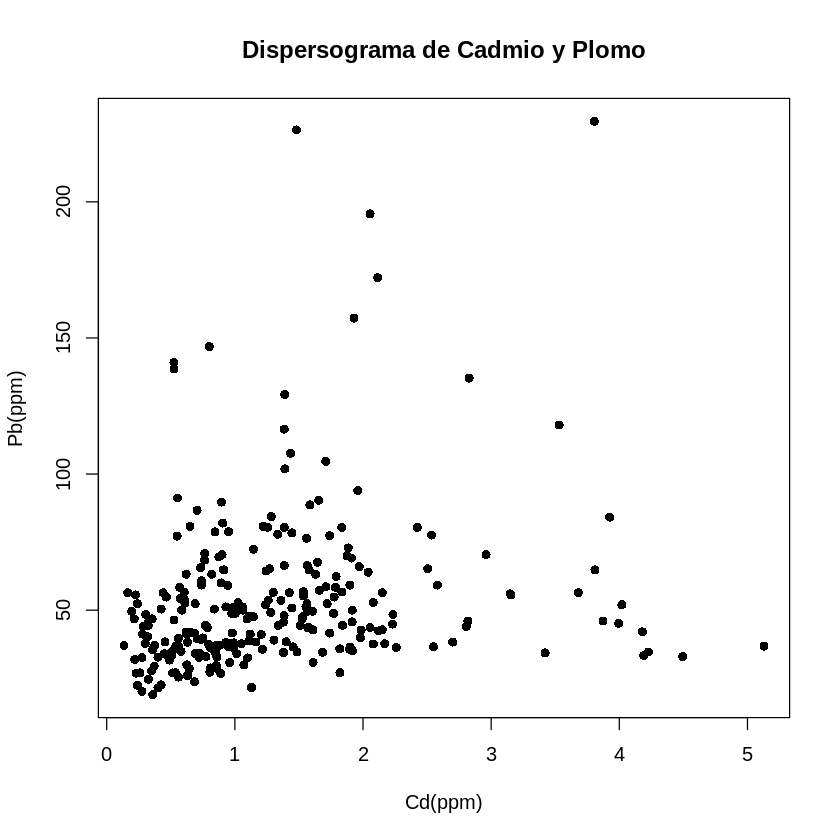

In [21]:
plot(h$Cd, h$Pb, xlab = "Cd(ppm)", ylab = "Pb(ppm)", pch = 16,
main = "Dispersograma de Cadmio y Plomo")

<p align = "justify">La relación entre dos variables puede ser resumida a través de un coeficiente, llamado coeficiente de correlación lineal, que mide el grado de “proporcionalidad” que existe entre ambas variables. Este coeficiente tiene un valor entre -1 y 1 (estos extremos corresponden al caso en el cual las variables son exactamente proporcionales entre sí, con un coeficiente de proporcionalidad negativo o positivo, respectivamente).

En R, el comando que le permite hacer este cálculo es el siguiente:

In [22]:
#Coeficiente de correlación usando el método de Pearson (default)
cor(h$Cd,h$Pb)
#Coeficiente de correlación usando el método de Kendall
cor(h$Cd,h$Pb, method="kendall")
#Coeficiente de correlación usando el método de Spearman
cor(h$Cd,h$Pb, method="spearman")

[1] 0.2223784

[1] 0.2222789

[1] 0.3303327

<p align = "justify">En los tres casos los valores se acercan a cero, lo que significa una baja intensidad de asociación directa.

### **3.2 Semivariograma**
<p align = "justify">Si para un valor dado de $h$, reunimos todos los pares de la muestra que están distantes $h$, y calculamos la media del cuadrado de la diferencia entre los valores de la variable observada, tenemos una medida numérica de la diferencia entre estos valores en función de la distancia $h$. El semivariograma es una función que mide la disimilitud entre pares de puntos que pertenecen a una cierta clase de distancia $h$. 

La fórmula matemática es:

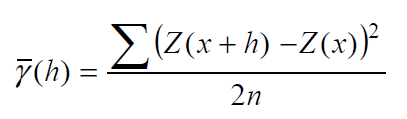

<p align = "justify">Donde $Z(x)$ es el valor de la variable en un sitio $x$, $Z(x+h)$ es otro valor muestral separado del anterior por una distancia $h$ y $n$ es el número de parejas que se encuentran separadas por dicha distancia. La función de semivarianza se calcula para varias distancias $h$.

<p align = "justify">La fórmula se corrige con un factor igual a 0.5 por motivos que se explicarán posteriormente, pero es debido a ello que se usa el termino de $semiovariograma$ generalmente.

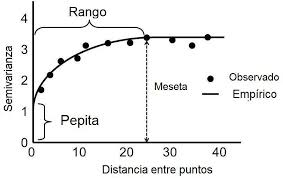

<p align = "justify">Si usamos la data $Jura$ y la variable $Cadmio$, el gráfico de semivariograma experimental (muestral), considerando solo la distancia (sin tomar en cuenta la dirección), se da con el siguiente código:

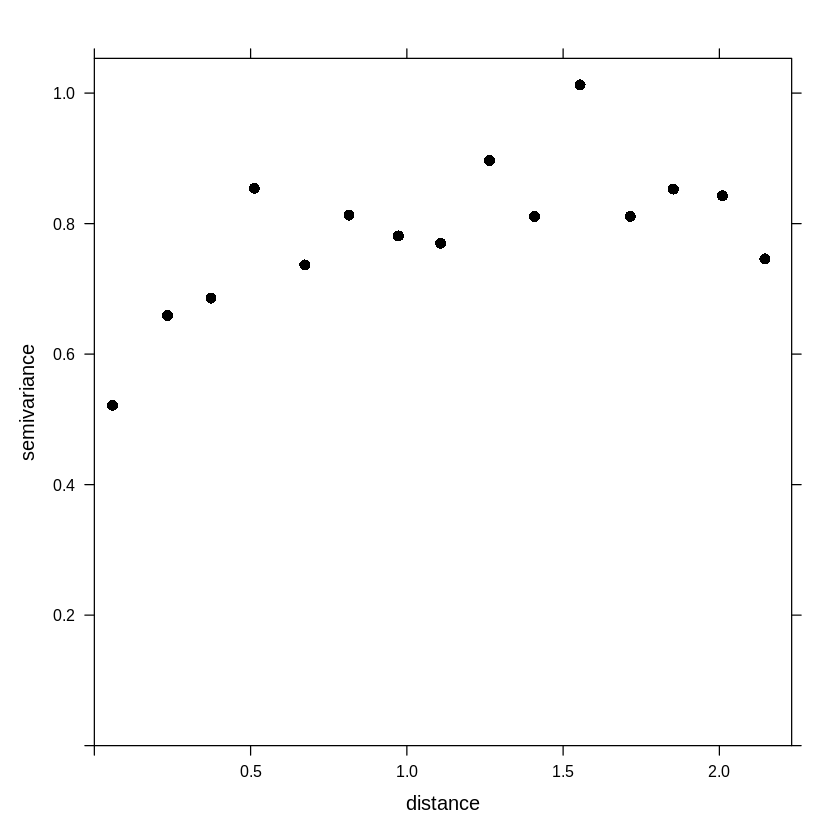

In [23]:
data(jura) 
g <- gstat(id = "Cd", formula = Cd~1, locations = ~Xloc+Yloc,
data = prediction.dat)
#id es el nombre de la variable que se va usar.
#formula=Cd~1 significa que no se harán transformaciones sobre los valores originales.
#locations son las coordenadas de posición.
#data es el nombre del archivo en el que se encuentran los datos.
graf<-variogram(g)
plot(graf, col = "black", pch = 16, cex = 1.1)

<p align = "justify">Se puede observar que la dispersión de los pares de valores se estabilizan alrededor de 0.8 (meseta total) desde aproximadamente 1km (rango o alcance), también se observa que, cerca del origen, el gráfico comienza un poco por encima de 0.5 (efecto pepita) .


El archivo de pares de puntos, según su distancia (h), se puede ver de la siguiente manera:

In [24]:
graf[,1:3]

np,dist,gamma
<dbl>,<dbl>,<dbl>
342,0.05811439,0.5215905
461,0.23422428,0.6590473
831,0.37321886,0.6857444
931,0.51183712,0.8541024
1022,0.67333526,0.7366727
1284,0.81491201,0.8130568
1251,0.97279054,0.7810457
1663,1.10785333,0.7699409
1582,1.26463821,0.8968099


<p align = "justify">La primera columa $np$ es el número de pares, la distancia es la $h$ usada para el cálculo de los pares y $gamma$ es el valor del semivariograma.
<p align = "justify">El comportamiento del semivariograma puede variar con la dirección, a continuación se ilustran los diferentes semivariogramas en función de la dirección:

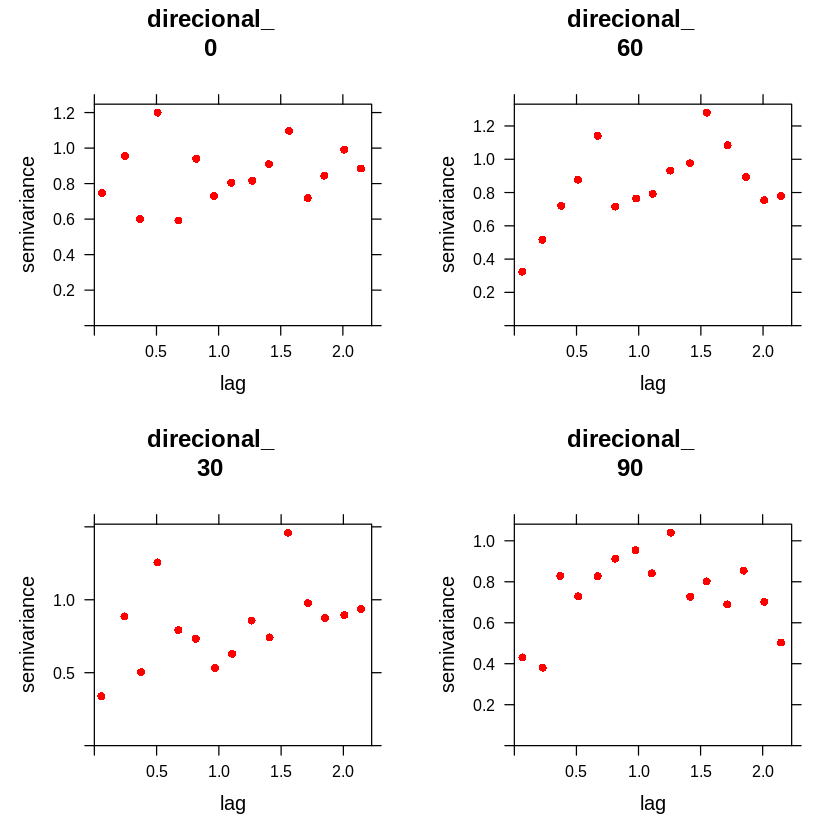

In [25]:
data = prediction.dat
g <- gstat(id = "Cd", formula = Cd~1, locations =
~Xloc+Yloc,
data = prediction.dat)
v<-variogram(g, alpha=0,tol.hor=30)
p1<-plot(v, xlab="lag",ylab="semivariance",main="direcional_
0",col="red", pch=16)
v<-variogram(g, alpha=30,tol.hor=30)
p2<-plot(v, xlab="lag",ylab="semivariance",main="direcional_
30",col="red", pch=16)
v<-variogram(g, alpha=60,tol.hor=30)
p3<-plot(v, xlab="lag",ylab="semivariance",main="direcional_
60",col="red", pch=16)
v<-variogram(g, alpha=90,tol.hor=30)
p4<-plot(v, xlab="lag",ylab="semivariance",main="direcional_
90",col="red", pch=16)

print(p1,split=c(1,1,2,2),more=TRUE)
print(p2,split=c(1,2,2,2),more=TRUE)
print(p3,split=c(2,1,2,2),more=TRUE)
print(p4,split=c(2,2,2,2))

<p align = "justify">Otra forma de visualizar semivariogramas direccionales es el mapa variográfico, que representa bloques de colores en el plano de acuerdo con el valor aproximado del semivariograma experimental.


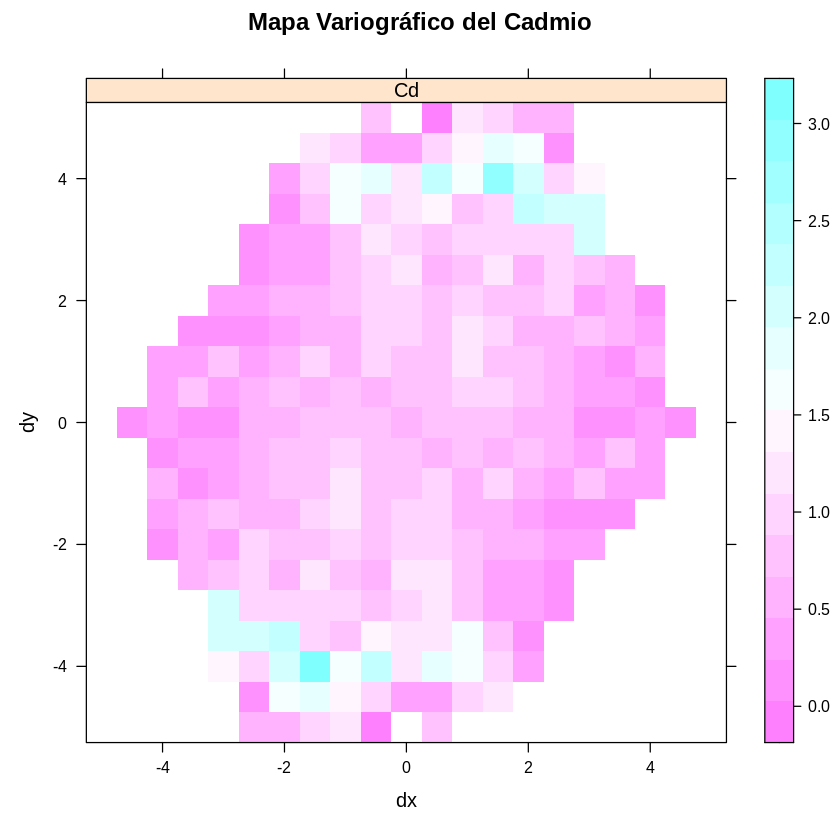

In [26]:
g<-gstat(id="Cd", formula=Cd~1, locations=~Xloc+Yloc,
data = prediction.dat)
plot(variogram(g,cutoff=5,width=0.5,map=TRUE),main="Mapa Variográfico del Cadmio") 
#map = TRUE para obtener el mapa variográfico.
#cutoff es la distancia máxima entre pares que será considerada. 
#width es el tamaño del lag.

<p align = "justify">Podemos apreciar el efecto de la anisotropía, mostrando que en el rango de direcciones de 0° a 30° la meseta se alcanza a partir de 4 km en adelante, a diferencia del rango de 60° a 120°, donde el semivariograma se estabiliza a menor distancia.

## **Conclusión**
<p align = "justify">En este primer post, además de revisar algunos conceptos básicos de la estadística exploratoria, presentamos algunos códgiso en R que nos ayudan en el cálculo y la representación gráfica. También vimos algunas estadísticas bivariadas, incluido el semivariograma, que es una estadística bivariada indexada en el espacio. 
<p align = "justify">Más adelante revisaremos los conceptos de probabilidad y variables aleatorias; presentaremos el concepto de función aleatoria, que es una generalización del concepto de vector aleatorio, así como sus propiedades más importantes como la estacionariedad de primer y segundo orden. 